In [ ]:
# Google Colaboratory를 사용할 때는 다음 주석을 해제하고 실행하기 바랍니다.

In [ ]:
# # 다음을 실행하면 authorization code 입력을 요청받습니다.
# # 출력된 링크를 클릭하고 Google 계정으로 로그인한 뒤,
# # authorization code를 복사해서 붙여 넣습니다.
# import os
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# working_dir = 'MLSys_100Knocks' #　※※ 여러분이 만든 폴더 경로가 다를 때는 다음을 변경합니다. ※※
# path = f'/content/drive/MyDrive/{working_dir}/MainChapter/chapter03'
# os.chdir(path)

In [ ]:
# Jupyter notebook ipywidgets 활성화
# for jupyter notebook (virtualenv 사용 시)
#!jupyter nbextension enable --user --py widgetsnbextension

# for jupyter lab
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

# 3장 시각화 구조를 구축하기 위한 테크닉 10

### 테크닉 21: 매장을 필터링해서 시각화하자

In [1]:
import pandas as pd
from IPython.display import display, clear_output

m_store = pd.read_csv('m_store.csv')
m_area = pd.read_csv('m_area.csv')
order_data = pd.read_csv('tbl_order_202104.csv')
order_data = pd.merge(order_data, m_store, on='store_id', how='left')
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')

# 마스터에 없는 코드에 대응한 문자열 설정
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'delivery'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'takeout'

order_data.loc[order_data['status'] == 0, 'status_name'] = '주문 접수'
order_data.loc[order_data['status'] == 1, 'status_name'] = '결제 완료'
order_data.loc[order_data['status'] == 2, 'status_name'] = '배달 완료'
order_data.loc[order_data['status'] == 9, 'status_name'] = '주문 취소'

order_data.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,결제 완료
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB,경기,경기북부,delivery,주문 취소
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료


In [2]:
from ipywidgets import Dropdown

def order_by_store(val):
    clear_output()
    display(dropdown)    
    pick_data = order_data.loc[(order_data['store_name']==val['new']) & 
                               (order_data['status'].isin([1, 2]))]
    display(pick_data.head())
    
store_list = m_store['store_name'].tolist()

dropdown = Dropdown(options=store_list, description='지역 선택:')
dropdown.observe(order_by_store, names='value')
display(dropdown)

Dropdown(description='지역 선택:', options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
49,12812014,1,C81203759,46,85076518,2021-04-01 11:03,2021-04-01 11:23,1,30500,1,삼일대로점,SL,서울,서울,takeout,결제 완료,2021-04-01
439,82305620,1,C93103282,74,51492324,2021-04-01 11:32,2021-04-01 11:56,1,26150,1,삼일대로점,SL,서울,서울,takeout,결제 완료,2021-04-01
647,19571374,1,C64109769,37,64728105,2021-04-01 11:51,2021-04-01 12:30,0,33000,2,삼일대로점,SL,서울,서울,delivery,배달 완료,2021-04-01
1294,85124975,1,C81492847,99,44023103,2021-04-01 12:49,2021-04-01 13:26,0,38650,2,삼일대로점,SL,서울,서울,delivery,배달 완료,2021-04-01
1479,98368295,1,C66276068,81,91808550,2021-04-01 13:06,2021-04-01 13:47,0,29870,2,삼일대로점,SL,서울,서울,delivery,배달 완료,2021-04-01


Dropdown(options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환로점', '성내로점', '자양로점…

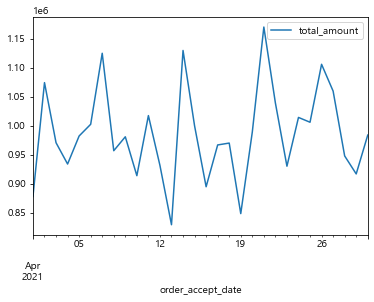

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# 한글 폰트 처리
import os

if os.name == 'nt':  # Windows
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix':  # macOS
    plt.rc('font', family='AllieGothic')

plt.rc('axes', unicode_minus=False)  # minus font settings


def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[
        (order_data['store_name'] == val['new']) &
        (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()


dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

### 테크닉 22: 여러 매장의 상세 정보를 시각화하자

In [4]:
from ipywidgets import SelectMultiple

def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new'])) &
                               (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

select = SelectMultiple(options=store_list)
select.observe(order_by_multi, names='value')
display(select)

SelectMultiple(index=(0, 1), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
49,12812014,1,C81203759,46,85076518,2021-04-01 11:03,2021-04-01 11:23,1,30500,1,삼일대로점,SL,서울,서울,takeout,결제 완료,2021-04-01
69,75821507,2,C39916077,89,20828249,2021-04-01 11:04,2021-04-01 11:43,1,26030,1,세종대로점,SL,서울,서울,takeout,결제 완료,2021-04-01
286,12439341,2,C41983039,58,89485581,2021-04-01 11:22,2021-04-01 11:33,0,32340,2,세종대로점,SL,서울,서울,delivery,배달 완료,2021-04-01
439,82305620,1,C93103282,74,51492324,2021-04-01 11:32,2021-04-01 11:56,1,26150,1,삼일대로점,SL,서울,서울,takeout,결제 완료,2021-04-01
583,39372433,2,C80973903,26,5757478,2021-04-01 11:46,2021-04-01 12:22,0,23880,2,세종대로점,SL,서울,서울,delivery,배달 완료,2021-04-01


SelectMultiple(description='매장 선택:', index=(0, 1, 2), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계…

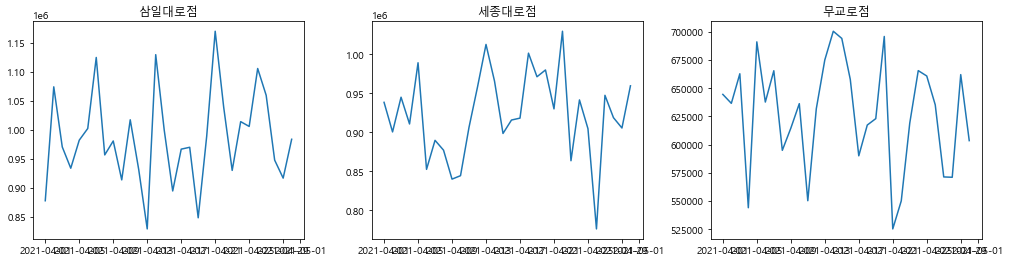

In [5]:
def graph_by_multi(val):
    clear_output()
    display(select2)

    fig = plt.figure(figsize=(17, 4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)

    i = 0

    for trg in val['new']:
        pick_data = order_data[
            (order_data['store_name'] == trg) &
            (order_data['status'].isin([1, 2]))]
        temp = pick_data[['order_accept_date', 
                          'total_amount', 'store_name']].copy()
        temp.loc[:, 'order_accept_date'] = \
            pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace=True)
        i += 1
        ax = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum())
        ax.set_title(trg)


select2 = SelectMultiple(options=store_list,
                         description='매장 선택:')
select2.observe(graph_by_multi, names='value')
display(select2)

### 테크닉 23: 슬라이드바를 이용해 주문 건수를 조사하자

In [6]:
from ipywidgets import IntSlider

def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() < val['new']])

slider = IntSlider(value=1100, min=1000, max=2000, step=100, 
                   description='건수:',)
slider.observe(store_lower, names='value')
display(slider)

IntSlider(value=1100, description='건수:', max=2000, min=1000, step=100)

In [7]:
def store_upper(val):
    clear_output()
    display(slider2)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() >= val['new']])

slider2 = IntSlider(value=1600, min=1000, max=2000, step=100,
                    description='건수:',)
slider2.observe(store_upper, names='value')
display(slider2)

IntSlider(value=1500, description='건수:', max=2000, min=1000, step=100)

store_name
남부순환로2점    1502
노해로2점      1613
녹사평대로2점    1535
무교로2점      1536
법원로점       2230
비아로점       1503
사우중로점      1583
사직로점       2263
서하로점       1501
송정해변로점     1534
온천천로점      1528
종로2점       1501
중앙대로점      2179
천호대로2점     1524
dtype: int64


### 테크닉 24: 토글 버튼을 이용해 지역 데이터를 추출하자

In [8]:
from ipywidgets import ToggleButtons

area_list = m_area['wide_area'].unique()


def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = order_data.loc[
        (order_data['wide_area'] == val['new']) &
        (order_data['status'].isin([1, 2]))]
    display(pick_data.head())


toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names='value')
display(toggle)

ToggleButtons(options=('서울', '부산', '대전', '광주', '세종', '경기'), value='서울')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,결제 완료,2021-04-01
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료,2021-04-01
7,10290387,30,C17281363,75,81945254,2021-04-01 11:00,2021-04-01 11:16,1,22380,1,마들로점,SL,서울,서울,takeout,결제 완료,2021-04-01
8,54821099,9,C16681192,90,9773815,2021-04-01 11:00,2021-04-01 11:35,0,23080,2,남부순환로점,SL,서울,서울,delivery,배달 완료,2021-04-01
10,71238056,79,C81534225,30,18403035,2021-04-01 11:00,2021-04-01 11:16,0,38650,2,종로2점,SL,서울,서울,delivery,배달 완료,2021-04-01


ToggleButtons(options=('서울', '부산', '대전', '광주', '세종', '경기'), value='서울')

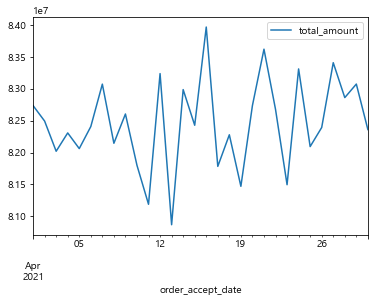

In [9]:
def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[
        (order_data['wide_area'] == val['new']) &
        (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = \
        pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()


toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area, names='value')
display(toggle2)

### 테크닉 25: 날짜를 지정해 데이터를 추출하자

In [10]:
from ipywidgets import DatePicker
import datetime

order_data.loc[:, 'order_date'] = pd.to_datetime(
    order_data['order_accept_date']).dt.date


def order_by_date(val):
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[
        (order_data['order_date'] == val['new']) &
        (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())


date_picker = DatePicker(value=datetime.datetime(2021, 4, 1))
date_picker.observe(order_by_date, names='value')
display(date_picker)

DatePicker(value=datetime.date(2021, 4, 1))

6337


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,결제 완료,2021-04-01
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료,2021-04-01
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료,2021-04-01
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료,2021-04-01
5,86102793,167,C06298599,21,70395221,2021-04-01 11:00,2021-04-01 11:59,1,37420,1,서하로점,GJ,광주,광주,takeout,결제 완료,2021-04-01


In [11]:
min_date = datetime.date(2021, 4, 1)
max_date = datetime.date(2021, 4, 30)


# 기간이 설정되면 호출되는 함수. 기간 데이터를 추출해서 화면에 표시
def order_between_date():
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[
        (order_data['order_date'] >= min_date) &
        (order_data['order_date'] <= max_date) &
        (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())


# 가장 이른 날짜(기간 시작)를 변수에 설정하는 함수
def set_min_date(val):
    global min_date
    min_date = val['new']
    order_between_date()


# 가장 느린 날짜(기간 끝)를 변수에 설정하는 함수
def set_max_date(val):
    global max_date
    max_date = val['new']
    order_between_date()


date_picker_min = DatePicker(value=min_date)
date_picker_min.observe(set_min_date, names='value')
print("기간 시작")
display(date_picker_min)
date_picker_max = DatePicker(value=max_date)
date_picker_max.observe(set_max_date, names='value')
print("기간 끝")
display(date_picker_max)

DatePicker(value=datetime.date(2021, 4, 1))

DatePicker(value=datetime.date(2021, 4, 10))

63425


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,결제 완료,2021-04-01
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달 완료,2021-04-01
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS,부산,부산,delivery,배달 완료,2021-04-01
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ,광주,광주,delivery,배달 완료,2021-04-01
5,86102793,167,C06298599,21,70395221,2021-04-01 11:00,2021-04-01 11:59,1,37420,1,서하로점,GJ,광주,광주,takeout,결제 완료,2021-04-01


### 테크닉 26: 스토리를 생각해서 데이터를 구축하자

In [12]:
import glob
import os

current_dir = os.getcwd()
tbl_order_file = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_files = glob.glob(tbl_order_file)

order_all = pd.DataFrame()
for file in tbl_order_files:
    order_tmp = pd.read_csv(file)
    print(f'{file}:{len(order_tmp)}')
    order_all = pd.concat([order_all, order_tmp], ignore_index=True)

# 유지 보수용 매장 데이터 삭제
order_all = order_all.loc[order_all['store_id'] != 999]

order_all = pd.merge(order_all, m_store, on='store_id', how='left')
order_all = pd.merge(order_all, m_area, on='area_cd', how='left')

# 마스터에 없는 코드에 대응한 문자옇 설정
order_all.loc[order_all['takeout_flag'] == 0, 'takeout_name'] = 'delivery'
order_all.loc[order_all['takeout_flag'] == 1, 'takeout_name'] = 'takeout'

order_all.loc[order_all['status'] == 0, 'status_name'] = '주문 접수'
order_all.loc[order_all['status'] == 1, 'status_name'] = '결제 완료'
order_all.loc[order_all['status'] == 2, 'status_name'] = '배달 완료'
order_all.loc[order_all['status'] == 9, 'status_name'] = '주문 취소'

order_all.loc[:, 'order_date'] = pd.to_datetime(
    order_all['order_accept_date']).dt.date

order_all.groupby(['store_id', 'customer_id'])["total_amount"].describe()

C:\Users\creat\Documents\translate\book18\MLSys_100Knocks\MainChapter\chapter03\tbl_order_202104.csv:233262
C:\Users\creat\Documents\translate\book18\MLSys_100Knocks\MainChapter\chapter03\tbl_order_202105.csv:241142
C:\Users\creat\Documents\translate\book18\MLSys_100Knocks\MainChapter\chapter03\tbl_order_202106.csv:233302


count          mean           std      min      25%  \
store_id customer_id                                                        
1        C00244531     14.0  33195.714286   8602.625462  18820.0  25157.5   
         C00493736      7.0  33181.428571   9225.469145  24710.0  27190.0   
         C01249550      9.0  28896.666667  10423.662984  18570.0  20640.0   
         C02241044      6.0  36538.333333  11844.077704  22520.0  25710.0   
         C02859946      9.0  32165.555556   8582.160438  18570.0  26470.0   
...                     ...           ...           ...      ...      ...   
196      C84471901     65.0  27887.538462   8096.654987   6980.0  22380.0   
         C88251581     57.0  30461.228070   9909.696923   6980.0  23280.0   
         C90878439     76.0  28634.605263   8527.747564   6980.0  21540.0   
         C97487773     62.0  30135.806452   9026.498431   6980.0  22380.0   
         C98683987     72.0  28679.861111   9114.931952   6980.0  21540.0   

                          50%      75%      max  
store_id customer_id                             
1        C00244531    36795.0  39010.0  44620.0  
         C00493736    29870.0  36155.0  51000.0  
         C01249550    26470.0  39000.0  46920.0  
         C02241044    39795.0  46837.5  46920.0  
         C02859946    35860.0  39000.0  39310.0  
...                       ...      ...      ...  
196      C84471901    26770.0  32340.0  46590.0  
         C88251581    29870.0  39000.0  46590.0  
         C90878439    26150.0  38650.0  46590.0  
         C97487773    27790.0  39000.0  46590.0  
         C98683987    26770.0  35300.0  46590.0  

[41336 rows x 8 columns]

In [13]:
summary_df = order_all.loc[order_all['status'].isin([1, 2])]
store_summary_df = summary_df.groupby(['store_id'])['total_amount'].sum()
store_summary_df = pd.merge(store_summary_df, m_store, on='store_id', how='left')
print("매출 상위")
display(store_summary_df.sort_values('total_amount', ascending=False).head(10))
print("매출 하위")
display(store_summary_df.sort_values('total_amount', ascending=True).head(10))

매출 상위


,store_id,total_amount,store_name,area_cd
47,48,120384690,노해로2점,SL
190,191,118095960,사우중로점,GB
122,123,113134310,송정해변로점,BS
67,68,112799400,천호대로2점,SL
62,63,112211910,녹사평대로2점,SL
126,127,111797560,분포로점,BS
99,100,111248660,온천천로점,BS
43,44,110643570,무교로2점,SL
78,79,110076670,종로2점,SL
172,173,110034720,비아로점,GJ


매출 하위


,store_id,total_amount,store_name,area_cd
100,101,53586580,중동2로점,BS
2,3,56984250,무교로점,SL
75,76,57112800,국제금융로2점,SL
151,152,57119100,대흥로점,DJ
11,12,57884940,봉화산로점,SL
195,196,58966680,석봉로점,GB
185,186,60675020,효원로점,GN
161,162,61621230,상무번영로점,GJ
69,70,62304610,은평로2점,SL
145,146,62967010,용운동점,DJ


In [14]:
cancel_df = pd.DataFrame()
cancel_cnt = order_all.loc[order_all['status'] == 9].groupby(
    ['store_id'])['store_id'].count()
order_cnt = order_all.loc[order_all['status'].isin([1, 2, 9])].groupby(
    ['store_id'])['store_id'].count()
cancel_rate = (cancel_cnt / order_cnt) * 100
cancel_df["cancel_rate"] = cancel_rate
cancel_df = pd.merge(cancel_df, m_store, on='store_id', how='left')
print("취소율 낮음")
display(cancel_df.sort_values('cancel_rate', ascending=True).head(10))
print("취소율 높음")
display(cancel_df.sort_values('cancel_rate', ascending=False).head(10))

취소율 낮음


,store_id,cancel_rate,store_name,area_cd
121,122,16.590164,해운대해변로점,BS
119,120,16.595404,청사포로점,BS
130,131,16.626287,둔산로점,DJ
40,41,17.073840,월계로점,SL
152,153,17.110834,내방로점,GJ
33,34,17.150396,성산동점,SL
146,147,17.290026,한남로점,DJ
19,20,17.304297,장승배기로점,SL
68,69,17.320341,올림픽로2점,SL
122,123,17.361261,송정해변로점,BS


취소율 높음


,store_id,cancel_rate,store_name,area_cd
7,8,20.218409,당산로점,SL
138,139,20.086795,한밭대로점,DJ
131,132,19.948335,대전로점,DJ
156,157,19.811321,우치로점,GJ
95,96,19.747546,구덕로점,BS
9,10,19.592697,성내로점,SL
65,66,19.592697,도봉로2점,SL
194,195,19.568966,화중로점,GB
75,76,19.525302,국제금융로2점,SL
176,177,19.483501,필문대로점,GJ


### 테크닉 27: 주문 취소 이유를 분석하자

In [15]:
def calc_delta(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds() / 60

order_all.loc[:, 'order_accept_datetime'] = pd.to_datetime(
    order_all['order_accept_date'])
order_all.loc[:, 'delivered_datetime'] = pd.to_datetime(
    order_all['delivered_date'])
order_all.loc[:, 'delta'] = order_all[[
    'order_accept_datetime', 'delivered_datetime'
    ]].apply(calc_delta, axis=1)

delivery_df = order_all.loc[
    (order_all['status'] == 2) &
    (order_all['store_id'].isin([8, 122]))]
delivery_df.groupby(['store_id'])['delta'].mean()

store_id
8      47.560231
122    20.164304
Name: delta, dtype: float64

### 테크닉 28: 가설을 검증하자

In [16]:
temp_cancel = cancel_df.copy()
temp_delivery = order_all.loc[order_all['status'] == 2].groupby(
    [('store_id')])['delta'].mean()
check_df = pd.merge(temp_cancel, temp_delivery, on='store_id', how='left')
check_df.head()

,store_id,cancel_rate,store_name,area_cd,delta
0,1,18.969885,삼일대로점,SL,34.378830
1,2,18.636756,세종대로점,SL,34.719848
2,3,18.555901,무교로점,SL,34.415958
3,4,18.160767,덕수궁길점,SL,34.498651
4,5,18.172100,서소문로점,SL,34.120035


In [17]:
# 전체
temp_chk = check_df[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.00000,0.65765
delta,0.65765,1.00000


In [18]:
# 취소율이 높은(3사분위 이상) 매장만
th_high = check_df['cancel_rate'].quantile(0.75)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_high)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

# 취소율이 낮은(1사분위 이하) 매장만
th_low = check_df['cancel_rate'].quantile(0.25)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_low)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.772029
delta,0.772029,1.000000


,cancel_rate,delta
cancel_rate,1.00000,0.61053
delta,0.61053,1.00000


### 테크닉 29: 스토리를 기반으로 부품과 데이터를 조합해 대시보드를 만들자

In [19]:
import seaborn as sns

# 환경 변수
target_store = ""
min_date = datetime.date(2021, 4, 1)
max_date = datetime.date(2021, 4, 30)

In [20]:
def make_board():
    clear_output()
    display(toggle_db)

    # 데이터 작성
    pick_order_data = order_all.loc[
        (order_all['store_name'] == target_store) &
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) &
        (order_all['status'].isin([1, 2]))
        ]
    pick_cancel_data = order_all.loc[
        (order_all['store_name'] == target_store) &
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) &
        (order_all['status'] == 9)
        ]
    pick_order_all = order_all.loc[
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) &
        (order_all['status'].isin([1, 2]))
        ]
    pick_cancel_all = order_all.loc[
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) &
        (order_all['status'] == 9)
        ]
    store_o_cnt = len(pick_order_data)
    store_c_cnt = len(pick_order_data['customer_id'].unique())
    store_cancel_rate = (len(pick_cancel_data) / (len(pick_order_data) +
                                                  len(pick_cancel_data))) * 100
    delivery_time = pick_order_data.loc[
        pick_order_data['status'] == 2]['delta'].mean()
    delivery_time_all = pick_order_all.loc[
        pick_order_all['status'] == 2]['delta'].mean()

    # 화면 그리기 처리
    temp = pick_order_data[['order_date', 'total_amount']].copy()
    temp.loc[:, 'order_date'] = pd.to_datetime(temp['order_date'])
    temp.set_index('order_date', inplace=True)

    print(f"========================================================================================================")
    str_out = f"■■{target_store}■■ [대상 기간]: {min_date}~{max_date}"
    str_out = str_out + f"[데이터 건수]: {store_o_cnt} 건, " \
                        f"[이용 고객 수]: {store_c_cnt}"
    print(str_out)
    print(f"--------------------------------------------------------------------------------------------------------")
    print(f"■■■■■■ 일간 매출 ■■■■■■■■")
    display(temp.resample('D').sum())
    print("--------------------------------------------------------------------------------------------------------")
    str_out = f"[기간 매출 총액:{'{:,}'.format(temp['total_amount'].sum())} "
    str_out = str_out + f"[주문 취소 총액]: " \
                        f"{'{:,}'.format(pick_cancel_data['total_amount'].sum())} "
    str_out = str_out + f"[주문 취소율]: {round(store_cancel_rate, 2)} % "
    print(str_out)
    str_out = f"[평균 배달 시간]: {round(delivery_time, 2)}분"
    str_out = str_out + f"[전 매장 평균 배달 시간]: " \
                        f"{round(delivery_time_all, 2)}분"
    print(str_out)
    print(f"--------------------------------------------------------------------------------------------------------")

    # 그래프 작성
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(temp.resample('D').sum(), ax=ax1, kde=False)
    ax1.set_title(f"매출(일 단위) 히스토그램")

    sns.countplot(x='order_date', data=pick_cancel_data, ax=ax2)
    ax2.set_title(f"주문 취소 수(일 단위)")

    fig, (ax3) = plt.subplots(1, 1, figsize=(20, 5))
    sns.boxplot(x="order_date", y="total_amount", data=pick_order_data)
    ax3.set_title(f"주문 상황 상자 수염도")

    plt.show()

In [21]:
# 캘린더 변경 시 처리
def change_date_min(val):
    global min_date
    min_date = val['new']
    make_board()

def change_date_max(val):
    global max_date
    max_date = val['new']
    make_board()

In [22]:
# 드롭다운 변경 시 처리
def change_dropdown(val):
    global target_store
    target_store = val['new']
    
    # 기간 지정 기능
    date_picker_min = DatePicker(value=min_date)
    date_picker_min.observe(change_date_min, names='value')
    print(f"기간")
    date_picker_max = DatePicker(value=max_date)
    date_picker_max.observe(change_date_max, names='value')
    display(date_picker_min, date_picker_max)

In [23]:
def order_by_area(val):
    clear_output()
    display(toggle_db)
    # 선택한 지역의 매장 목록을 만든다.
    store_list = order_all.loc[
        order_all['wide_area'] == val['new']]['store_name'].unique()
    # 만들어진 매장 리스트로 드롭다운을 만든다.
    dropdown = Dropdown(options=store_list)
    dropdown.observe(change_dropdown, names='value')
    display(dropdown)

In [24]:
# 토글 버튼 표시
toggle_db = ToggleButtons(options=area_list)
toggle_db.observe(order_by_area, names='value')
display(toggle_db)

ToggleButtons(options=('서울', '부산', '대전', '광주', '세종', '경기'), value='서울')

### 테크닉 30: 대시보드를 개선하자

In [25]:
cal_orders_base = order_all.loc[(order_all['status'].isin([1, 2]))]

# 지역 순위(배달 시간)
print(f"배달 시간 ===============")
print(f"지역 순위 ---------------")
display(pd.DataFrame(cal_orders_base.groupby(['narrow_area'])
                     ['delta'].mean().sort_values()))
print(f"지역별 TOP 5 ---------------")
for area in m_area['area_cd']:
    temp = cal_orders_base.loc[cal_orders_base['area_cd'] == area]
    temp = temp.groupby(['store_id'])['delta'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'delta']]
    display(temp.head())

배달 시간 ===============
지역 순위 ---------------


,delta
narrow_area,
세종,32.237884
부산,33.705678
서울,34.486309
경기북부,34.512554
경기남부,34.549012
광주,34.747533
대전,34.931595


지역별 TOP 5 ---------------


,store_name,delta
0,올림픽로2점,20.259576
1,월계로점,20.292949
2,성산동점,20.330812
3,장승배기로점,20.511744
4,양재2점,33.965273


,store_name,delta
0,청사포로점,20.155399
1,해운대해변로점,20.214623
2,송정해변로점,20.326104
3,감천항로점,33.921085
4,달맞이길점,34.025184


,store_name,delta
0,둔산로점,20.042499
1,배재로점,33.896845
2,한남로점,33.905990
3,신일동로점,34.116358
4,계룡로점,34.138131


,store_name,delta
0,내방로점,20.248798
1,봉선로점,33.854262
2,예술길점,34.082332
3,광주여대길점,34.330333
4,준법로점,34.346223


,store_name,delta
0,문예회관길점,20.420270
1,금송로점,34.356755
2,조치원점,34.450122
3,세종로점,34.452113
4,절재로점,34.583509


,store_name,delta
0,영통구점,34.051593
1,기흥점,34.339094
2,성남대로점,34.703129
3,효원로점,34.807790
4,처인구점,34.864482


,store_name,delta
0,석봉로점,33.877167
1,사우중로점,34.522113
2,부흥로점,34.530631
3,화중로점,34.588424
4,방죽로점,34.591199


In [26]:
# 지역 순위(취소율)
base_df = pd.merge(check_df, m_store, on='area_cd')
base_df = pd.merge(base_df, m_area, on='area_cd')
print(f"주문 취소율 ===============")
print(f"지역 순위 ---------------")
display(pd.DataFrame(base_df.groupby(['narrow_area'])
                     ['cancel_rate'].mean().sort_values()))
print(f"지역별 TOP 5 ---------------")
for area in m_area['area_cd']:
    temp = check_df.loc[check_df['area_cd'] == area]
    temp = temp.groupby(['store_id'])['cancel_rate'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[
        ['store_name', 'cancel_rate']]
    display(temp.head())

주문 취소율 ===============
지역 순위 ---------------


,cancel_rate
narrow_area,
부산,18.231331
세종,18.268806
대전,18.329304
경기남부,18.388690
광주,18.449330
서울,18.458221
경기북부,18.572727


지역별 TOP 5 ---------------


,store_name,cancel_rate
0,월계로점,17.073840
1,성산동점,17.150396
2,장승배기로점,17.304297
3,올림픽로2점,17.320341
4,도봉로점,17.425432


,store_name,cancel_rate
0,해운대해변로점,16.590164
1,청사포로점,16.595404
2,송정해변로점,17.361261
3,중앙대로점,17.451169
4,마린시티1로점,17.604618


,store_name,cancel_rate
0,둔산로점,16.626287
1,한남로점,17.290026
2,복수서로점,17.418874
3,신갈마로점,17.547387
4,용운동점,17.697063


,store_name,cancel_rate
0,내방로점,17.110834
1,장동로점,17.485598
2,용아로점,17.560489
3,효덕로점,17.786864
4,상무대로점,17.837674


,store_name,cancel_rate
0,문예회관길점,17.410714
1,조치원점,17.446198
2,금송로점,18.335942
3,세종로점,18.531268
4,절재로점,18.852259


,store_name,cancel_rate
0,효원로점,17.625000
1,영통구점,17.753510
2,처인구점,18.737673
3,기흥점,18.827930
4,성남대로점,18.999339


,store_name,cancel_rate
0,사우중로점,17.853436
1,일산동구점,18.023084
2,부흥로점,18.301793
3,방죽로점,18.838604
4,석봉로점,18.850482
